# Tennis Dataset with Decision Tree

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
# from dtreeviz.trees import dtreeviz
import dtreeviz

- **[dtreeviz](https://github.com/parrt/dtreeviz)** : Decision Tree Visualization Library

In [2]:
tennis = pd.read_feather("datasets/tennis.feather")
tennis

,outlook,temperature,humidity,wind,play
0,Sunny,Hot,High,Weak,0
1,Sunny,Hot,High,Strong,0
2,Sunny,Mild,High,Weak,0
3,Sunny,Mild,Normal,Strong,1
4,Sunny,Cool,Normal,Weak,1
5,Overcast,Hot,High,Weak,1
6,Overcast,Hot,Normal,Weak,1
7,Overcast,Mild,High,Strong,1
8,Overcast,Cool,Normal,Strong,1
9,Rain,Mild,High,Weak,1


In [3]:
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   wind         14 non-null     object
 4   play         14 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 688.0+ bytes


In [4]:
X = tennis[['outlook', 'temperature', 'humidity', 'wind']]
X = pd.get_dummies(X, dtype=int)
X.head()

,outlook_Overcast,outlook_Rain,outlook_Sunny,temperature_Cool,temperature_Hot,temperature_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,0,0,1,0,0,1,1,0,0,1
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,1,0,0,0,1,0,1


In [5]:
y = tennis['play']
y.head()

0    0
1    0
2    0
3    1
4    1
Name: play, dtype: int64

In [6]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


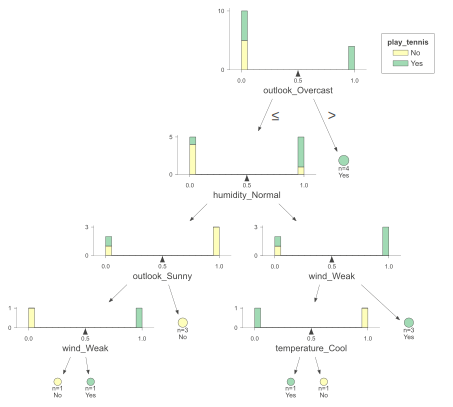

In [7]:
viz = dtreeviz.model(dt, X, y,
                     target_name='play_tennis',
                     feature_names=X.columns,
                     class_names=['No', 'Yes'])
viz.view()

In [8]:
pd.crosstab(tennis['outlook'], tennis['play'].replace({0:'NO', 1:'YES'}))

play,NO,YES
outlook,,
Overcast,0,4
Rain,2,3
Sunny,3,2


In [9]:
pd.crosstab(tennis.outlook, tennis.play.replace({0:'NO', 1:'YES'}), normalize='columns')

play,NO,YES
outlook,,
Overcast,0.0,0.444444
Rain,0.4,0.333333
Sunny,0.6,0.222222


In [15]:
prob_outcomes = tennis.play.value_counts(sort=False, normalize=True)
outlook = pd.crosstab(tennis.outlook, tennis.play, normalize='columns')
temperature = pd.crosstab(tennis.temperature, tennis.play, normalize='columns')
humidity = pd.crosstab(tennis.humidity, tennis.play, normalize='columns')
wind = pd.crosstab(tennis.wind, tennis.play, normalize='columns')

In [17]:
proba = prob_outcomes
proba *= outlook.loc["Sunny"]
proba *= temperature.loc["Mild"]
proba *= humidity.loc["Normal"]
proba *= wind.loc["Weak"]
print(proba)

play
0    0.006857
1    0.028219
Name: proportion, dtype: float64
